# Machine Learning Pset 1 Question 3
## Mong Chang Hsi
## 1003085

#### People who I've talked to Xiang Qian, Jireh and Andri

In [38]:
# import the relevant libraries

import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [30]:
# Reading the Input Files
with open("hw1_ridge_x.dat", "r") as reader:
    input_data = []
    for line in reader.readlines():
        line = line.replace("\n", "")
        line = line.split(",")
        for i in range(len(line)):
            line[i] = float(line[i])
        line = np.array(line)
        input_data.append(line)
input_data = np.array(input_data)


# Reading the Output Files
with open("hw1_ridge_y.dat", "r") as reader:
    output_data = []
    for line in reader.readlines():
        line = line.replace("\n", "")
        line = line.split(",")
        for i in range(len(line)):
            line[i] = float(line[i])
        line = np.array(line)
        output_data.append(line)
output_Data = np.array(output_data)

## Part a

In [51]:
# Separating the dataset into validation and training sets

v_input = input_data[:10]
t_input = input_data[10:]

v_output = output_data[:10]
t_output = output_data[10:]

def ridge_regression(tX, tY, l):
    n = tX.shape[1] # taking the col size
    weight = inv(n * l * np.identity(n) + tX.transpose().dot(tX)).dot(tX.transpose()).dot(tY)
    return weight

print("The Value is " + str(ridge_regression(t_input, t_output, 0.15)))

The Value is [[-0.57293812]
 [ 1.34849   ]
 [ 0.03132541]
 [-1.85105483]]


## Part b

Minimum validation loss for λ = -0.9


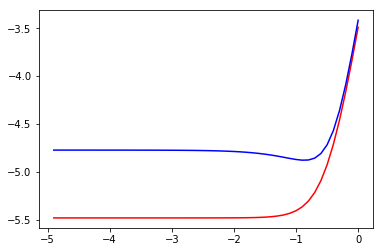

In [50]:
tn = t_input.shape[0]
vn = v_input.shape[0]
training_loss = []
validation_loss = []
index = -np.arange( 0 , 5 , 0.1 )

for i in index:
    weight = ridge_regression(t_input, t_output, 10**i)
    training_loss = training_loss + [np.sum((np.dot(t_input, weight) - t_output) ** 2) / tn / 2]
    validation_loss = validation_loss + [np.sum((np.dot(v_input, weight) - v_output) ** 2) / vn / 2]
    
plt.plot(index,np.log(training_loss),'r')
plt.plot(index,np.log(validation_loss),'b')

print("Minimum validation loss for λ =", index[validation_loss.index(min(validation_loss))])